In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  'font.size': 12,
  'grid.alpha': 0.25})


## Function declarations

### Read `ods` to `DataFrame`


In [2]:
def read_ods(filename, columns):
  key_arr = (k for k in columns.keys())
  df = pd.read_excel(filename, engine="odf", header=0,
                     usecols=columns)
  df = df.rename(columns=columns)
  return df


## Load the data

In [3]:
filename = "03-table-01-sales-of-saws-for-acme-tool.ods"
df = read_ods(filename, {"t": "t", "Sales": "Y_t"})
df.head()

,t,Y_t
0,1,500
1,2,350
2,3,250
3,4,400
4,5,450


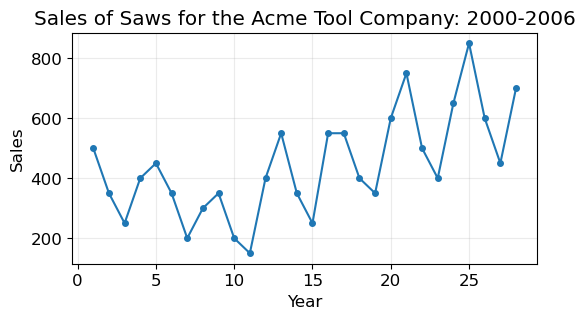

In [8]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df["t"], df["Y_t"], marker='o', markersize=4)
ax.set_xlabel("Year")
ax.set_ylabel("Sales")
ax.set_title("Sales of Saws for the Acme Tool Company: 2000-2006")
ax.grid("on")
plt.show(fig)


## Forecasting (naive method)

In [16]:
df_forecast = df.copy()
df_forecast["hat_Y_t"] = df_forecast["Y_t"].shift(1)
df_forecast["e_t"] = df_forecast["Y_t"] - df_forecast["hat_Y_t"]
df_forecast 


,t,Y_t,hat_Y_t,e_t
0,1,500,NaN,NaN
1,2,350,500.0,-150.0
2,3,250,350.0,-100.0
3,4,400,250.0,150.0
4,5,450,400.0,50.0
5,6,350,450.0,-100.0
6,7,200,350.0,-150.0
7,8,300,200.0,100.0
8,9,350,300.0,50.0
9,10,200,350.0,-150.0


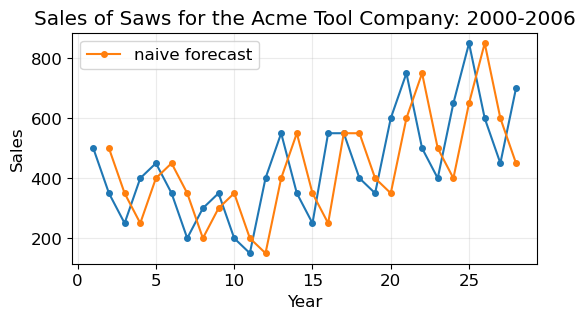

In [15]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df_forecast["t"], df_forecast["Y_t"], 
  marker='o', markersize=4)
ax.plot(df_forecast["t"], df_forecast["hat_Y_t"], 
  marker='o', markersize=4, label='naive forecast')

ax.set_xlabel("Year")
ax.set_ylabel("Sales")
ax.set_title("Sales of Saws for the Acme Tool Company: 2000-2006")
ax.grid("on")
ax.legend(loc="best")
plt.show(fig)


### residual

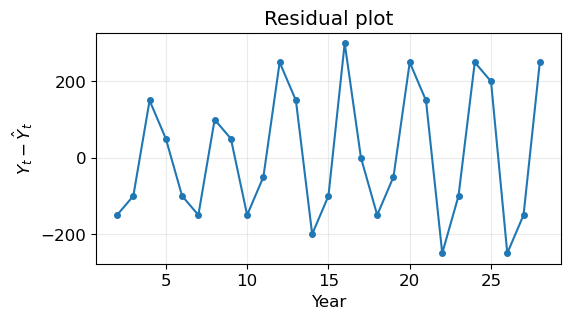

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(df_forecast["t"], df_forecast["e_t"], 
  marker='o', markersize=4)

ax.set_xlabel("Year")
ax.set_ylabel("$Y_t - \hat{Y}_t$")
ax.set_title("Residual plot")
ax.grid("on")
plt.show(fig)
